### import


In [1]:
import pandas as pd

from google_play_scraper import reviews, Sort

import warnings

warnings.filterwarnings("ignore")

### 데이터 수집


### 구글 playstore 리뷰 데이터


In [2]:
def gstore_reviews(app_id):
    # 리뷰 가져오기
    result = reviews(
        app_id,
        lang="en",  # 한국어 리뷰
        country="us",  # 한국
        sort=Sort.NEWEST,  # 최신 리뷰 먼저 가져오기
        count=100000,  # 가져올 리뷰 수 (최대 100000)
    )

    # 리뷰 데이터
    review_data = result[0]

    # DataFrame으로 변환
    return pd.DataFrame(review_data)

In [3]:
qz_df = gstore_reviews("com.quizlet.quizletandroid")
# qz_df.to_csv("quizlet_rv.csv", index=False, encoding="utf-16")

In [4]:
qz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92183 entries, 0 to 92182
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              92183 non-null  object        
 1   userName              92183 non-null  object        
 2   userImage             92183 non-null  object        
 3   content               92144 non-null  object        
 4   score                 92183 non-null  int64         
 5   thumbsUpCount         92183 non-null  int64         
 6   reviewCreatedVersion  83007 non-null  object        
 7   at                    92183 non-null  datetime64[ns]
 8   replyContent          1398 non-null   object        
 9   repliedAt             1398 non-null   datetime64[ns]
 10  appVersion            83007 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 7.7+ MB


In [23]:
# 전체 리뷰 중 평점이 2점 이하인 부정 리뷰 추출
neg_reviews = qz_df[qz_df["score"] <= 2][["userName", "content", "score", "at"]]
neg_reviews.to_csv("eng_neg_reviews.csv", index=False, encoding="utf-8-sig")
neg_reviews

,userName,content,score,at
6,A Google user,What a good app for studying🥰,1,2025-02-27 03:28:37
9,A Google user,"it doesn't pronounce words Auto, just does it ...",2,2025-02-27 00:38:48
23,A Google user,Very bad,1,2025-02-26 19:38:50
43,A Google user,"I used to love quizlet, but then they put lear...",1,2025-02-26 07:40:46
46,A Google user,"requires creating an account, totally USELESS ...",1,2025-02-26 05:46:09
...,...,...,...,...
92133,A Google user,Who tested this app. I can't register myself a...,1,2013-08-30 06:54:20
92134,A Google user,I can't install shame. Done kind of error may ...,1,2013-08-29 15:47:52
92136,A Google user,Won't let me sign up keeps askin me to put my ...,1,2013-08-28 11:42:15
92137,A Google user,Highly disorganized and it is just random sear...,1,2013-08-28 08:34:17


### 사용자 리뷰를 토대로 Quizlet의 학습용, 교구용 비율 분석


In [5]:
# 학습용 분류 키워드 설정
study_keywords = [
    "exam",
    "vocabulary",
    "concept",
    "review",
    "memorization",
    "test",
    "learn",
    "study",
    "practice",
]
# 교구용 분류 키워드 설정
teaching_keywords = [
    "lesson",
    "quiz",
    "teacher",
    "worksheet",
    "student",
    "teachingl",
    "activity",
    "flashcard",
]


# 함수 정의
def categorize_content(text):
    if isinstance(text, str):  # 문자열인지 확인
        if any(word in text for word in study_keywords):
            return "학습용"
        elif any(word in text for word in teaching_keywords):
            return "교구용"
    return "기타"

# category 컬럼 추가, values = "학습용", "교구용", "기타"
qz_df["category"] = qz_df["content"].apply(categorize_content)

# 카테고리별 비율 계산
category_counts = qz_df["category"].value_counts(normalize=True) * 100

category_counts

category
기타     53.457796
학습용    41.662779
교구용     4.879425
Name: proportion, dtype: float64

### 유료 요금제 관련 리뷰 분석


In [16]:
# 유료 요금 관련 리뷰 키워드 설정
plus_keywords = [
    "charged",
    "feed",
    "paid",
    "plus",
]

# 함수 정의
def paid_plan_content(text):
    if isinstance(text, str):  # 문자열인지 확인
        if any(word in text for word in plus_keywords):
            return True  # 키워드 포함된 경우, 원래 텍스트 반환
    return False  # 키워드 미포함 시 None 반환

# 필터링 된 리뷰만 저장
result_df = qz_df[qz_df["content"].apply(paid_plan_content)][
    ["userName", "content", "score", "at"]
].reset_index(drop=True)

# result_df.to_csv("plus_rv.csv", index=False, encoding="utf-8")
result_df

,userName,content,score,at
0,A Google user,"I NEVER pay for apps, but i did purchase the u...",4,2025-02-23 14:10:22
1,A Google user,I love Quizlet. I wish you could use the learn...,5,2025-02-21 04:27:12
2,A Google user,Locking the test feature for Quizlet plus user...,1,2025-02-19 23:16:58
3,A Google user,It's just so good. I used it during my annual ...,5,2025-02-16 12:32:13
4,A Google user,I'm still in the free trial for the plus versi...,5,2025-02-16 05:17:53
...,...,...,...,...
1108,A Google user,Very helpful plus it's free. Win win,5,2014-10-06 04:47:30
1109,A Google user,"You can create cards on android now, but if yo...",2,2014-06-12 02:25:11
1110,A Google user,I love the simple/minimalist look of the appli...,4,2014-03-26 08:21:38
1111,A Google user,"1. Can't skip vocabulary (on a downloaded set,...",1,2013-11-05 15:28:37


### 문서 스캔 기능 관련 리뷰 분석


In [17]:
# 문서 스캔 기능 관련 리뷰 분석
scan_keywords = [
    "scan",
    "recogni",
]

# 함수 정의
def scan_content(text):
    if isinstance(text, str):  # 문자열인지 확인
        if any(word in text for word in scan_keywords):
            return True  # 키워드 포함된 경우 True 반환
    return False  # 키워드 미포함 시 False 반환

# 스캔 관련 리뷰 필터링
filtered_df = qz_df[qz_df["content"].apply(scan_content)][
    ["userName", "content", "score"]
].reset_index(drop=True)

# filtered_df.to_csv("scan_rv.csv", index=False, encoding="utf-16")
filtered_df

,userName,content,score
0,A Google user,I saw dat cool scan and create into quiz optio...,1
1,A Google user,"has some best free features, only if it was ac...",4
2,A Google user,Hands down the best app for memorization. The ...,5
3,A Google user,it's so good manually to make flash cards but ...,4
4,A Google user,Creation of flash cards with OCR scanning save...,5
...,...,...,...
145,A Google user,Suited my learning style. Unfortunately synony...,4
146,A Google user,Better to add some rating of every word. It is...,5
147,A Google user,I love this app cause it has all the awesome f...,5
148,A Google user,There needs be better recognition for answers ...,5


### 워드클라우드 생성


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stopwords import get_stopwords

nltk.download("punkt")  # 토크나이저 다운로드

def get_WordCloud(df, title):
    stopwords = set(get_stopwords(language="en"))
    combined_text = " ".join(df["content"].astype(str))  # 모든 리뷰 합치기
    tokens = word_tokenize(combined_text.lower())  # 영어 단어 토큰화 및 소문자 변환
    filtered_tokens = [
        word for word in tokens if word.isalpha() and word not in stopwords
    ]
    word_freq = Counter(filtered_tokens)
    top_words = word_freq.most_common(80) # 상위 80개 단어 추출
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="black",
        colormap="Pastel1",
        max_words=80,
    ).generate_from_frequencies(dict(top_words))

    # 워드 클라우드 출력
    plt.figure(figsize=(10, 5))
    plt.title(title, fontsize=18, fontweight="bold")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\blueb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


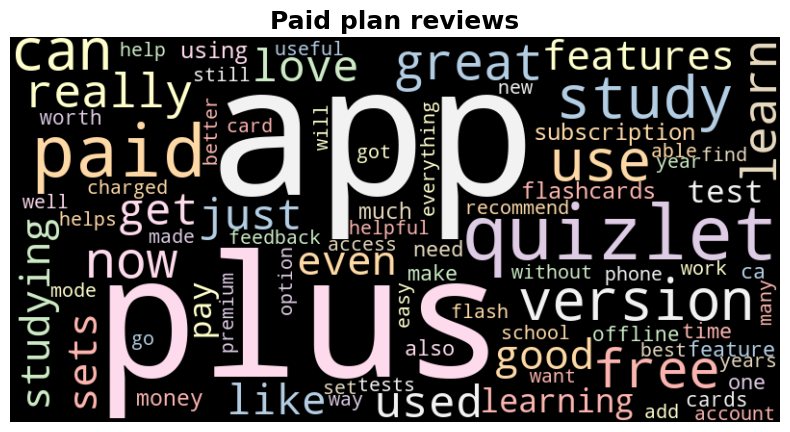

In [12]:
get_WordCloud(result_df, "Paid plan reviews")

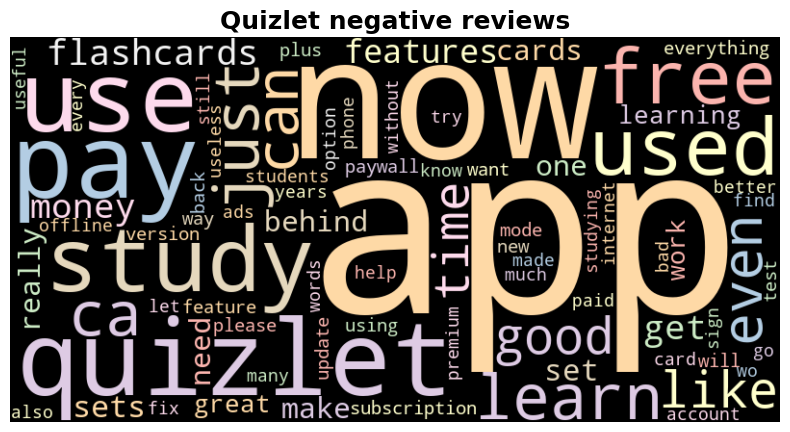

In [13]:
get_WordCloud(qz_df[qz_df["score"] <= 2], "Quizlet negative reviews")